# ENGS 27 Final Project Starter Code
[Enter Names of Group Members Here]

Please copy this code to work on your own version!

The following code interfaces with the noisy channel, hosted on a Dartmouth website.

In [2]:
import math
import subprocess

def noisy_channel(bits: str) -> str:
    """
    Calls curl to POST the given bits to the test.py endpoint
    and returns the stdout response as a string.
    """
    # Build the curl command and arguments:
    cmd = [
        "curl",
        "-X", "POST",
        "-d", f"bits={bits}",
        "https://engs27.host.dartmouth.edu/cgi-bin/noisychannel.py"
    ]

    # Run the command, capture stdout/stderr
    result = subprocess.run(
        cmd,
        stdout=subprocess.PIPE,
        stderr=subprocess.PIPE,
        text=True,       # return strings instead of bytes
        check=False      # we’ll inspect returncode manually
    )

    if result.returncode != 0:
        # curl failed. You can raise, log, or return stderr.
        raise RuntimeError(f"curl failed (code {result.returncode}):\n{result.stderr}")

    return result.stdout.split("<body>")[1].split("</body>")[0]


Example Usage

In [3]:
noisy_channel("0110")

'0110'

Let's collect data from different string lengths

In [4]:
import matplotlib.pyplot as plt
from collections import Counter
import json

Mutation Summary:
Original '1' -> Mutations: {'1': 98, '0': 2}
Original '0' -> Mutations: {'0': 100}
Original '11' -> Mutations: {'11': 95, '01': 5}
Original '10' -> Mutations: {'10': 96, '11': 2, '00': 2}
Original '01' -> Mutations: {'01': 99, '11': 1}
Original '00' -> Mutations: {'00': 99, '01': 1}


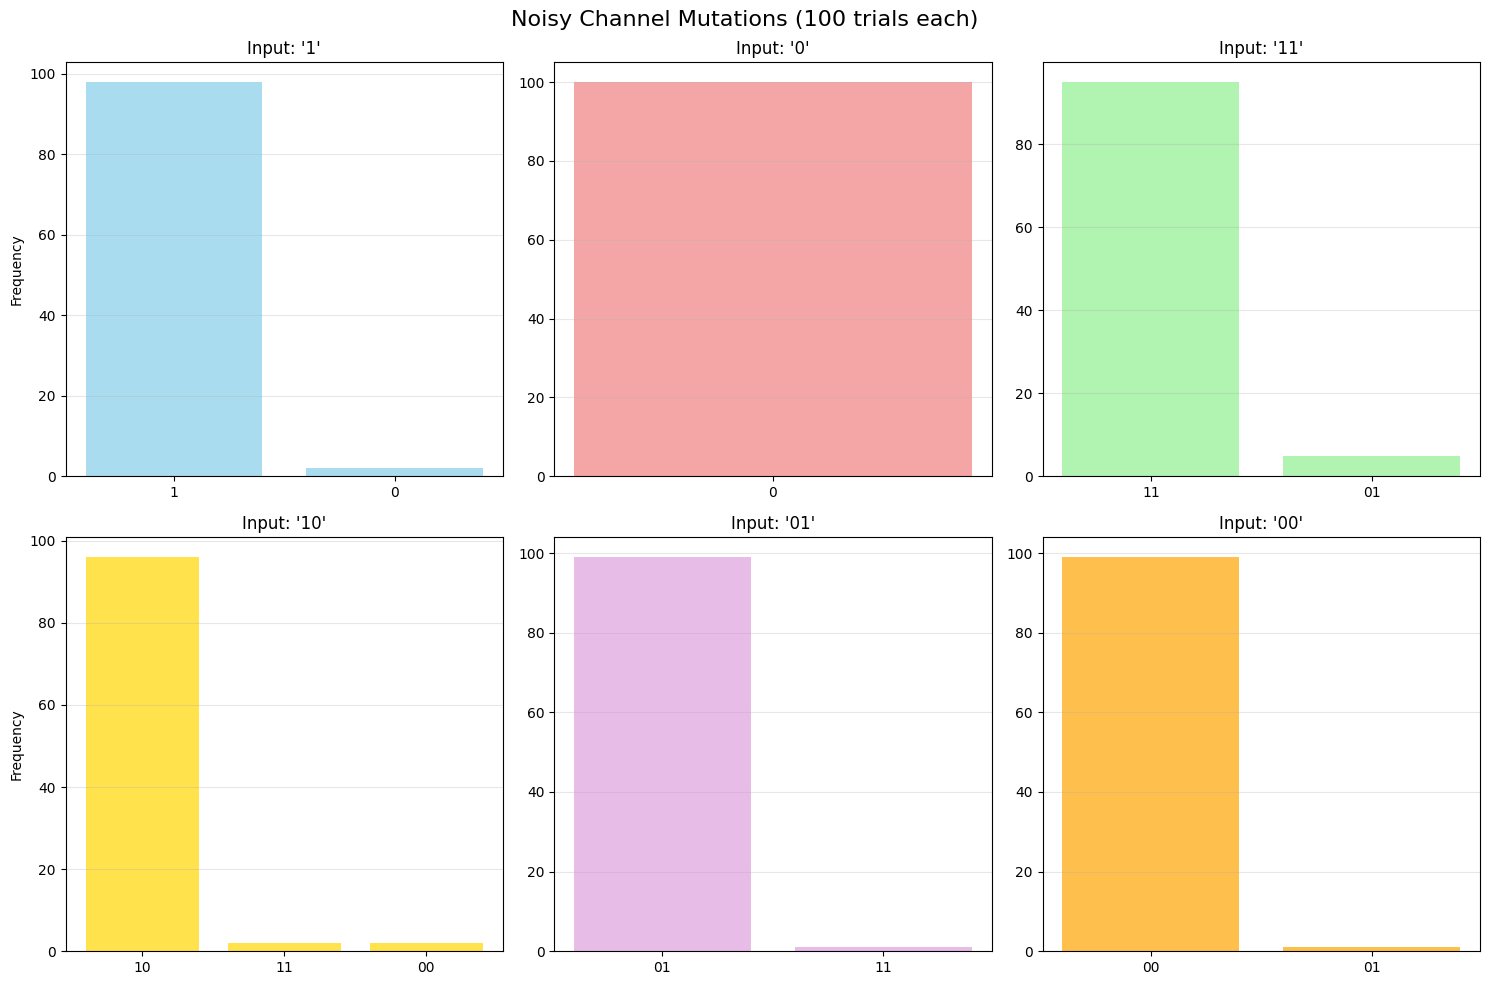

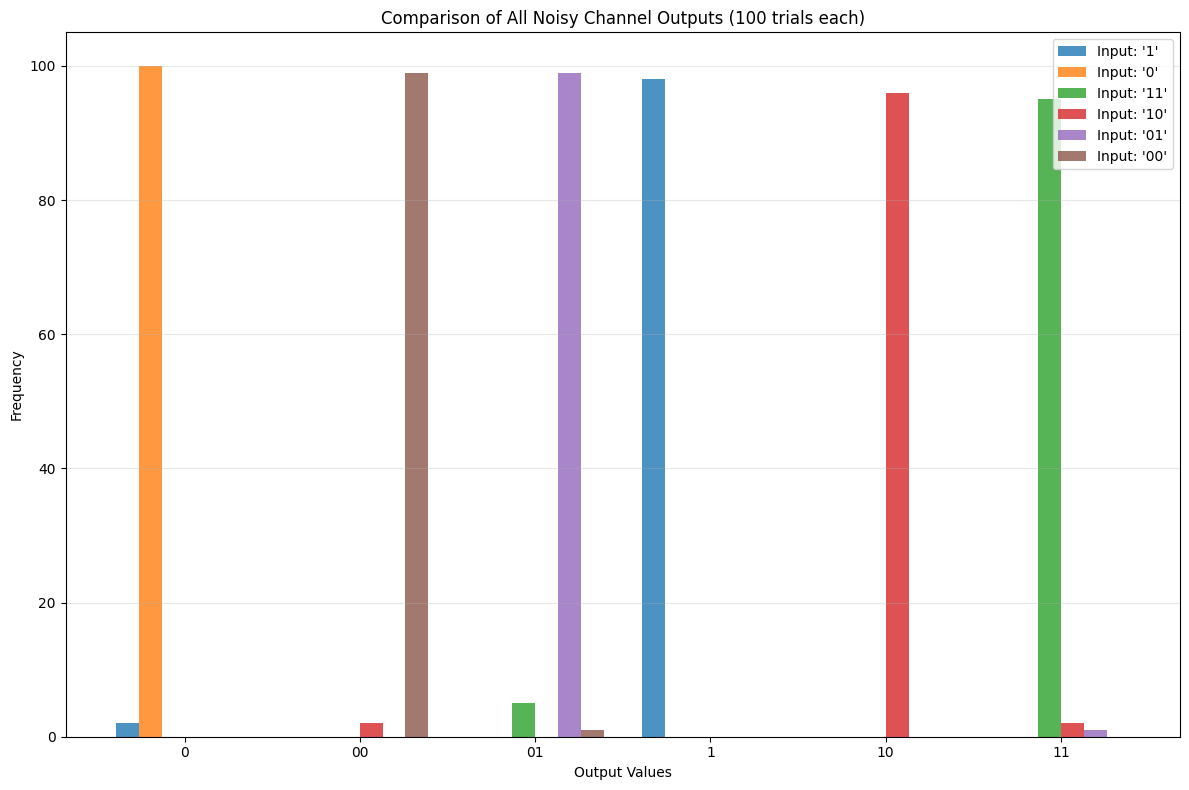


Error Rates:
'1' -> correct: 98.0%, error: 2.0%
'0' -> correct: 100.0%, error: 0.0%
'11' -> correct: 95.0%, error: 5.0%
'10' -> correct: 96.0%, error: 4.0%
'01' -> correct: 99.0%, error: 1.0%
'00' -> correct: 99.0%, error: 1.0%


In [60]:
one = '1'
zero = '0'

oneone = '11'
onezero = '10'
zeroone = '01'
zerozero = '00'

num_trials = 100

one_trials: list[str] = []
zero_trials: list[str] = []
oneone_trials: list[str] = []
onezero_trials: list[str] = []
zeroone_trials: list[str] = []
zerozero_trials: list[str] = []

for _ in range(num_trials):
    one_trials.append(noisy_channel(one))
    zero_trials.append(noisy_channel(zero))
    oneone_trials.append(noisy_channel(oneone))
    onezero_trials.append(noisy_channel(onezero))
    zeroone_trials.append(noisy_channel(zeroone))
    zerozero_trials.append(noisy_channel(zerozero))

results_data = {
    'one_trials': one_trials,
    'zero_trials': zero_trials,
    'oneone_trials': oneone_trials,
    'onezero_trials': onezero_trials,
    'zeroone_trials': zeroone_trials,
    'zerozero_trials': zerozero_trials
}

with open('noisy_channel_results.json', 'w') as f:
    json.dump(results_data, f, indent=2)

one_counts = Counter(one_trials)
zero_counts = Counter(zero_trials)
oneone_counts = Counter(oneone_trials)
onezero_counts = Counter(onezero_trials)
zeroone_counts = Counter(zeroone_trials)
zerozero_counts = Counter(zerozero_trials)

print("Mutation Summary:")
print(f"Original '1' -> Mutations: {dict(one_counts)}")
print(f"Original '0' -> Mutations: {dict(zero_counts)}")
print(f"Original '11' -> Mutations: {dict(oneone_counts)}")
print(f"Original '10' -> Mutations: {dict(onezero_counts)}")
print(f"Original '01' -> Mutations: {dict(zeroone_counts)}")
print(f"Original '00' -> Mutations: {dict(zerozero_counts)}")

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle(f'Noisy Channel Mutations ({num_trials} trials each)', fontsize=16)

axes[0, 0].bar(one_counts.keys(), one_counts.values(), color='skyblue', alpha=0.7)
axes[0, 0].set_title("Input: '1'")
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(axis='y', alpha=0.3)

axes[0, 1].bar(zero_counts.keys(), zero_counts.values(), color='lightcoral', alpha=0.7)
axes[0, 1].set_title("Input: '0'")
axes[0, 1].grid(axis='y', alpha=0.3)

axes[0, 2].bar(oneone_counts.keys(), oneone_counts.values(), color='lightgreen', alpha=0.7)
axes[0, 2].set_title("Input: '11'")
axes[0, 2].grid(axis='y', alpha=0.3)

axes[1, 0].bar(onezero_counts.keys(), onezero_counts.values(), color='gold', alpha=0.7)
axes[1, 0].set_title("Input: '10'")
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].grid(axis='y', alpha=0.3)

axes[1, 1].bar(zeroone_counts.keys(), zeroone_counts.values(), color='plum', alpha=0.7)
axes[1, 1].set_title("Input: '01'")
axes[1, 1].grid(axis='y', alpha=0.3)

axes[1, 2].bar(zerozero_counts.keys(), zerozero_counts.values(), color='orange', alpha=0.7)
axes[1, 2].set_title("Input: '00'")
axes[1, 2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

all_outputs = set()
all_outputs.update(one_counts.keys())
all_outputs.update(zero_counts.keys())
all_outputs.update(oneone_counts.keys())
all_outputs.update(onezero_counts.keys())
all_outputs.update(zeroone_counts.keys())
all_outputs.update(zerozero_counts.keys())

sorted_outputs = sorted(all_outputs)

fig, ax = plt.subplots(figsize=(12, 8))

x_pos = range(len(sorted_outputs))
width = 0.13

ax.bar([x - 2.5*width for x in x_pos], [one_counts.get(output, 0) for output in sorted_outputs],
       width, label="Input: '1'", alpha=0.8)
ax.bar([x - 1.5*width for x in x_pos], [zero_counts.get(output, 0) for output in sorted_outputs],
       width, label="Input: '0'", alpha=0.8)
ax.bar([x - 0.5*width for x in x_pos], [oneone_counts.get(output, 0) for output in sorted_outputs],
       width, label="Input: '11'", alpha=0.8)
ax.bar([x + 0.5*width for x in x_pos], [onezero_counts.get(output, 0) for output in sorted_outputs],
       width, label="Input: '10'", alpha=0.8)
ax.bar([x + 1.5*width for x in x_pos], [zeroone_counts.get(output, 0) for output in sorted_outputs],
       width, label="Input: '01'", alpha=0.8)
ax.bar([x + 2.5*width for x in x_pos], [zerozero_counts.get(output, 0) for output in sorted_outputs],
       width, label="Input: '00'", alpha=0.8)

ax.set_xlabel('Output Values')
ax.set_ylabel('Frequency')
ax.set_title(f'Comparison of All Noisy Channel Outputs ({num_trials} trials each)')
ax.set_xticks(x_pos)
ax.set_xticklabels(sorted_outputs)
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nError Rates:")
print(f"'1' -> correct: {one_counts.get('1', 0)/num_trials:.1%}, error: {(num_trials - one_counts.get('1', 0))/num_trials:.1%}")
print(f"'0' -> correct: {zero_counts.get('0', 0)/num_trials:.1%}, error: {(num_trials - zero_counts.get('0', 0))/num_trials:.1%}")
print(f"'11' -> correct: {oneone_counts.get('11', 0)/num_trials:.1%}, error: {(num_trials - oneone_counts.get('11', 0))/num_trials:.1%}")
print(f"'10' -> correct: {onezero_counts.get('10', 0)/num_trials:.1%}, error: {(num_trials - onezero_counts.get('10', 0))/num_trials:.1%}")
print(f"'01' -> correct: {zeroone_counts.get('01', 0)/num_trials:.1%}, error: {(num_trials - zeroone_counts.get('01', 0))/num_trials:.1%}")
print(f"'00' -> correct: {zerozero_counts.get('00', 0)/num_trials:.1%}, error: {(num_trials - zerozero_counts.get('00', 0))/num_trials:.1%}")

Let's make a binary tree to define our huffman encoding from the Brown Corpus

In [ ]:
f = open('./corpus/brown-train-sentences.txt', 'r')
corpus = f.read()

chars: set[str] = set()
char_freqs: dict[str, int] = {}

for char in corpus:
    if char in chars:
        char_freqs[char] += 1
    else:
        chars.add(char)
        char_freqs[char] = 1

# We'll define a binary tree and tell python to use the frequencies to compare them
# That way we can use the built in sort function
class BinaryTree:
    def __init__(self, char: str, freq: int, left: 'BinaryTree' = None, right: 'BinaryTree' = None):
        self.char = char
        self.freq = freq
        self.left = left
        self.right = right

    def __repr__(self):
        return f"BinaryTree({self.char}, {self.freq}, {self.left}, {self.right})"

    def __lt__(self, other: 'BinaryTree') -> bool:
        return self.freq < other.freq

    def __le__(self, other: 'BinaryTree') -> bool:
        return self.freq <= other.freq

    def __gt__(self, other: 'BinaryTree') -> bool:
        return self.freq > other.freq

    def __ge__(self, other: 'BinaryTree') -> bool:
        return self.freq >= other.freq

    def __eq__(self, other: 'BinaryTree') -> bool:
        return self.freq == other.freq

binary_trees: list[BinaryTree] = []
# Could add punctuation, but you don't really need it for sending an intelligible message
# Feel free to add more characters, so you can use them in sending a message!
alphabet: set[str] = {'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', ' '}
for char, freq in char_freqs.items():
    if char in alphabet:
        binary_trees.append(BinaryTree(char, freq))

binary_trees = sorted(binary_trees, reverse=True)

Dictionary for fast encoding and decoding

In [ ]:
# We need to recursively merge the two least frequent characters until we have one tree
while len(binary_trees) > 1:
    last_tree: BinaryTree = binary_trees.pop()
    second_last_tree: BinaryTree = binary_trees.pop()
    # /nac is reserved
    new_tree = BinaryTree("/nac", last_tree.freq + second_last_tree.freq, last_tree, second_last_tree)
    binary_trees.append(new_tree)
    binary_trees = sorted(binary_trees, reverse=True)

huffman_encoding: dict[str, str] = {}
huffman_decoding: dict[str, str] = {}
# Recursively find the paths to the leaves, which is the huffman encoding
def find_paths(tree: BinaryTree, path: str = "") -> None:
    if tree.left is None and tree.right is None:
        huffman_encoding[tree.char] = path
        huffman_decoding[path] = tree.char
    else:
        find_paths(tree.left, path + "0")
        find_paths(tree.right, path + "1")

find_paths(binary_trees[0])
print(huffman_decoding)

{'0000': 'h', '00010': 'u', '00011': 'c', '001': 'e', '0100': 'r', '0101': 's', '0110': 'n', '011100': 'b', '011101': 'y', '011110': 'w', '011111': 'g', '1000': 'i', '1001': 'o', '1010': 'a', '10110': 'd', '10111': 'l', '110000': 'p', '1100010': 'v', '1100011000': 'z', '1100011001': 'q', '1100011010': 'j', '1100011011': 'x', '11000111': 'k', '110010': 'f', '110011': 'm', '1101': 't', '111': ' '}


Test encoding and decoding a message with our Huffman encode/decode function

In [8]:
message = "hello world"

def encode(message: str, huffman_encoding: dict[str, str]) -> str:
    encoded_message = ""
    for char in message:
        encoded_message += huffman_encoding[char]
    return encoded_message

def decode(message: str, huffman_decoding: dict[str, str]) -> str:
    decoded_message = ""
    temp_code = ""
    for char in message:
        temp_code += char
        if temp_code in huffman_decoding.keys():
            decoded_message += huffman_decoding[temp_code]
            temp_code = ""
    return decoded_message

encoded_message: str = encode(message, huffman_encoding)
print(encoded_message)
decoded_message: str = decode(encoded_message, huffman_decoding)
print(decoded_message)

000000110111101111001111011110100101001011110110
hello world


Add hamming code to our huffman encoded message, so we know when a bit was flipped

In [ ]:
import math

# There are no good comments for this code
def add_hamming_code(data_bits: str) -> str:
    parity_bits = 0
    # Would be worth memoizing
    while 2 ** parity_bits < (len(data_bits) + parity_bits + 1):
        parity_bits += 1

    hamming_coded_array: list[str] = []
    # There's an online checker we use for this, but it uses reversed data bits
    data_iterator = iter(reversed(data_bits))
    parities: list[str] = []

    # We're following https://en.wikipedia.org/wiki/Hamming_code#General_algorithm
    # theta(k)
    for i in range(1, len(data_bits) + parity_bits + 1):
        if i & (i - 1) == 0:
            hamming_coded_array.append('x')
        else:
            hamming_coded_array.append(next(data_iterator))

    # Garbage theta(n*k) code, but it works for now
    for i in range(parity_bits):
        parity = 'x'
        for j, bit in enumerate(hamming_coded_array):
            if (j + 1) & (1 << i) != 0 and bit != 'x':
                if parity == 'x' :
                    parity = int(bit)
                else:
                    parity = int(bit) ^ parity
        parities.append(str(parity))

    # theta(n)
    for i, bit in enumerate(hamming_coded_array):
        if bit == 'x':
            hamming_coded_array[i] = parities.pop(0)

    return "".join(hamming_coded_array)

def remove_hamming_code(hamming_bits: str) -> str:
    parity_bits = math.floor(math.log(len(hamming_bits), 2)) + 1

    expected_parities: list[int] = []
    parities: list[int] = [-1] * parity_bits
    data_bits: list[str] = []
    is_error: bool = False
    error_idx: int = 0

    for i in range(1, len(hamming_bits) + 1):
        if i & (i - 1) == 0:
            expected_parities.append(int(hamming_bits[i - 1]))
        else:
            data_bits.append(hamming_bits[i - 1])
            for j in range(parity_bits):
                if i & (1 << j) != 0:
                    if parities[j] == -1:
                        parities[j] = int(hamming_bits[i - 1])
                    else:
                        parities[j] = int(hamming_bits[i - 1]) ^ parities[j]

    for i in range(parity_bits):
        if expected_parities[i] != parities[i]:
            is_error = True
            error_idx += 2 ** i

    # Given that one of our parity bits is wrong, we can flip the bit at the error index
    if is_error:
        original_message = list(hamming_bits)
        original_message[error_idx - 1] = str(int(original_message[error_idx - 1]) ^ 1)
        data_bits = []
        for i in range(1, len(hamming_bits) + 1):
            if i & (i - 1) != 0:
                data_bits.append(original_message[i - 1])

    return "".join(data_bits.__reversed__())

print(encoded_message)
hamming_coded_message = add_hamming_code(encoded_message)
print(hamming_coded_message)
hamming_coded_message_corrupted = str(int(hamming_coded_message) + 1)
print(hamming_coded_message_corrupted)
hamming_decoded_message = remove_hamming_code(hamming_coded_message_corrupted)
print(hamming_decoded_message)
print(decode(hamming_decoded_message, huffman_decoding))

000000110111101111001111011110100101001011110110
100111011111010001010010111101101100111101111011000000
100111011111010001010010111101101100111101111011000001
000000110111101111001111011110100101001011110110
hello world


Now to use the actually noisy channel, we can use the function below

In [ ]:
def send_message(message: str, packet_size: tuple[int, int] = (7, 4)) -> str:
    huffman_encoded_message = encode(message, huffman_encoding)
    whole_huffman_decoded_message = ""
    # Should parallelize this, but I don't want to DDoS Bijan
    for packet in range(0, len(huffman_encoded_message), packet_size[1]):
        curr_packet = huffman_encoded_message[packet:packet + packet_size[1]]
        hamming_encoded_packet = add_hamming_code(curr_packet)
        noisy_packet = noisy_channel(hamming_encoded_packet)
        whole_huffman_decoded_message += remove_hamming_code(noisy_packet)
    return decode(whole_huffman_decoded_message, huffman_decoding)

send_message("a super duper long message")

'a super duper long message'

In [11]:
message_trials = 50
correct = 0

for i in range(message_trials):
    message = "a super duper long message"
    if send_message(message) == message:
        correct += 1

print(float(correct) / float(message_trials))

0.88


Ok now the fun part. We have a prior on the noise of the channel. Namely, we know it sometimes acts as a binary asymmetric channel! This type of noise is pretty common in memory circuit, where an electrical charge stored in the capacitors (in the case of DRAM), can dissipate with time. In that case the probability of a 1->0 is higher than a 0->1.

In [ ]:
def chunk_str(s: str, k: int) -> list[str]:
    return [s[i:i+k] for i in range(0, len(s), k)]

def xor_bits(a: str, b: str) -> str:
    return ''.join('1' if (x != y) else '0' for x, y in zip(a, b))

def calibrate_bac(noisy_channel: Callable[[str], str], n: int = 400) -> tuple[float, float]:
    """
    Estimate (p01, p10) by sending n zeros and n ones through the channel once each.
    p01 = P(0->1); p10 = P(1->0)
    """
    z = '0' * n
    o = '1' * n
    rz = noisy_channel(z)
    ro = noisy_channel(o)
    p01 = rz.count('1') / float(n)
    p10 = ro.count('0') / float(n)
    return p01, p10


def make_neglog_cache(p01: float, p10: float) -> dict[str, dict[str, float]]:
    eps = 1e-15
    return {
        '0': {  # y = 0
            '0': -math.log(max(1.0 - p01, eps)),
            '1': -math.log(max(p10, eps)),
        },
        '1': {  # y = 1
            '0': -math.log(max(p01, eps)),
            '1': -math.log(max(1.0 - p10, eps)),
        }
    }

def _b(x: str) -> int: return 1 if x == '1' else 0
def _s(x: int) -> str: return '1' if x else '0'

def h74_encode_nibble(d: str) -> str:
    d1, d2, d3, d4 = map(_b, d)
    p1 = d1 ^ d2 ^ d4
    p2 = d1 ^ d3 ^ d4
    p3 = d2 ^ d3 ^ d4
    return f"{_s(p1)}{_s(p2)}{_s(d1)}{_s(p3)}{_s(d2)}{_s(d3)}{_s(d4)}"

# Precompute 16 codewords and map both ways because I've been doing leetcode
_H74_M2C: dict[str, str] = {}
for v in range(16):
    d = ''.join('1' if (v >> i) & 1 else '0' for i in (3,2,1,0))
    _H74_M2C[d] = h74_encode_nibble(d)
_H74_CANDS: list[tuple[str, str]] = list(_H74_M2C.items())  # [(d4, c7), ...]

def h74_encode(bits: str) -> tuple[str, dict]:
    pads = (4 - (len(bits) % 4)) % 4
    if pads:
        bits = bits + '0' * pads
    coded = ''.join(h74_encode_nibble(nib) for nib in chunk_str(bits, 4))
    return coded, {"pads": pads, "info_len": len(bits) - pads}

def h74_ml_decode(coded: str, neglog: dict[str, dict[str, float]], meta: dict) -> str:
    out = []
    for blk in chunk_str(coded, 7):
        if len(blk) < 7: break
        best_cost = float('inf')
        best_d = None
        # brute-force ML over all 16 codewords (tiny)
        for d4, cw in _H74_CANDS:
            cost = 0.0
            for y, x in zip(blk, cw):
                cost += neglog[y][x]
            if cost < best_cost:
                best_cost = cost
                best_d = d4
        out.append(best_d)
    dec = ''.join(out)
    
    trim = meta.get("pads", 0)
    if trim:
        dec = dec[:-trim]
    return dec

In [44]:
class Repetition:
    def __init__(self, r: int = 3):
        assert r >= 1
        self.r = r
    def encode(self, bits: str) -> tuple[str, dict]:
        return ''.join(ch * self.r for ch in bits), {"info_len": len(bits)}
    def decode(self, coded: str, p01: float, p10: float, meta: dict) -> str:
        eps = 1e-15
        r = self.r
        out = []
        for blk in chunk_str(coded, r):
            if len(blk) < r: break
            k1 = blk.count('1')
            k0 = r - k1
            # log-likelihoods for X=1 vs X=0
            lp1 = k1 * math.log(max(1.0 - p10, eps)) + k0 * math.log(max(p10, eps))
            lp0 = k1 * math.log(max(p01, eps))       + k0 * math.log(max(1.0 - p01, eps))
            out.append('1' if lp1 > lp0 else '0')
        return ''.join(out)[:meta["info_len"]]


If we were certain that our environment (the noisy channel) was stationary, we would subsitute \alpha=\epsilon with \alpha=\frac{1}{k}, where k is the number of times we've pulled the arm.

In [47]:
import random

class EpsGreedyBandit:
    def __init__(self, actions: list[str], eps: float = 0.1, seed: int = 0):
        self.actions = actions
        self.eps = eps
        self.rng = random.Random(seed)
        self.n = {a: 0 for a in actions}
        self.q = {a: 0.0 for a in actions}
    def select(self) -> str:
        if self.rng.random() < self.eps:
            return self.rng.choice(self.actions)
        return max(self.actions, key=lambda a: self.q[a])
    def update(self, a: str, r: float):
        self.n[a] += 1
        self.q[a] += (r - self.q[a]) / self.n[a]

In [48]:
class Scheme:
    def __init__(self, name: str,
                 encode: Callable[[str], tuple[str, dict]],
                 decode: Callable[[str, dict, dict, float, float], str]):
        self.name = name
        self.encode = encode
        self.decode = decode

def make_hamming_scheme() -> Scheme:
    def enc(bits: str) -> tuple[str, dict]:
        coded, meta = h74_encode(bits)
        meta["info_len"] = len(bits)
        return coded, meta
    def dec(rcvd: str, meta: dict, neglog: dict[str, dict[str, float]], p01: float, p10: float) -> str:
        # Hamming ML uses only neglog cache
        dec_bits = h74_ml_decode(rcvd, neglog, meta)
        return dec_bits[:meta["info_len"]]
    return Scheme("Hamming74-ML", enc, dec)

def make_rep_scheme(r: int) -> Scheme:
    rep = Repetition(r=r)
    def enc(bits: str) -> tuple[str, dict]:
        return rep.encode(bits)
    def dec(rcvd: str, meta: dict, neglog: dict[str, dict[str, float]], p01: float, p10: float) -> str:
        return rep.decode(rcvd, p01, p10, meta)
    return Scheme(f"Repeat{r}-ML", enc, dec)

In [51]:
def send_bitstring_rl(bitstring: str,
                      noisy_channel: Callable[[str], str],
                      packet_info_bits: int = 32,
                      eps: float = 0.1,
                      efficiency_weight: float = 1.0,
                      ber_weight: float = 6.0,
                      p01: float = None,
                      p10: float = None,
                      pilot_len: int = 400,
                      seed: int = 0,
                      schemes: List[Scheme] = None) -> Tuple[str, Dict]:
    """
    Transmit a '0101...' bitstring through `noisy_channel` using ε-greedy over schemes.
    Returns (decoded_bitstring, stats).
    """
    # Calibrate channel if not provided
    if p01 is None or p10 is None:
        p01, p10 = calibrate_bac(noisy_channel, n=pilot_len)
    neglog = make_neglog_cache(p01, p10)

    if schemes is None:
        schemes = [make_hamming_scheme(), make_rep_scheme(3)]

    bandit = EpsGreedyBandit([s.name for s in schemes], eps=eps, seed=seed)
    scheme_map = {s.name: s for s in schemes}

    total_len = len(bitstring)
    decoded_stream_parts: List[str] = []
    stats = {
        "p01": p01, "p10": p10,
        "packets": 0,
        "by_scheme": {s.name: {"uses":0, "tx_bits":0, "info_bits":0, "bit_errors":0} for s in schemes},
        "overall_efficiency": 0.0,
        "overall_ber": 0.0,
        "bandit_values": {}, "bandit_counts": {}
    }

    for pkt in chunk_str(bitstring, packet_info_bits):
        if len(pkt) < packet_info_bits:
            pkt = pkt + '0' * (packet_info_bits - len(pkt))

        action = bandit.select()
        sch = scheme_map[action]

        coded, meta = sch.encode(pkt)                 # scheme-specific encode
        rcvd = noisy_channel(coded)                   # BAC
        dec  = sch.decode(rcvd, meta, neglog, p01, p10)

        dec = dec[:len(pkt)]                          # keep only the packet size
        # metrics
        errors = sum(1 for a, b in zip(pkt, dec) if a != b)
        ber = errors / float(len(pkt))
        efficiency = len(pkt) / float(len(coded)) if len(coded) else 0.0
        reward = efficiency_weight * efficiency - ber_weight * ber
        bandit.update(action, reward)

        st = stats["by_scheme"][action]
        st["uses"] += 1
        st["tx_bits"] += len(coded)
        st["info_bits"] += len(pkt)
        st["bit_errors"] += errors
        stats["packets"] += 1

        decoded_stream_parts.append(dec)

    # aggregates
    totals = {"tx_bits": 0, "info_bits": 0, "bit_errors": 0}
    for name, st in stats["by_scheme"].items():
        for k in totals:
            totals[k] += st[k]
        st["efficiency"] = (st["info_bits"]/st["tx_bits"]) if st["tx_bits"] else 0.0
        st["ber"] = (st["bit_errors"]/st["info_bits"]) if st["info_bits"] else 0.0

    stats["overall_efficiency"] = (totals["info_bits"]/totals["tx_bits"]) if totals["tx_bits"] else 0.0
    stats["overall_ber"] = (totals["bit_errors"]/totals["info_bits"]) if totals["info_bits"] else 0.0
    stats["bandit_values"] = dict(bandit.q)
    stats["bandit_counts"] = dict(bandit.n)

    decoded_full = ''.join(decoded_stream_parts)[:total_len]  # trim to original Huffman length
    return decoded_full, stats

In [ ]:
def send_message_rl_text(message: str,
                         encode: Callable[..., str],
                         decode: Callable[..., str],
                         huffman_encoding,
                         huffman_decoding,
                         noisy_channel: Callable[[str], str],
                         packet_info_bits: int = 32,
                         eps: float = 0.1,
                         efficiency_weight: float = 1.0,
                         ber_weight: float = 6.0,
                         p01: float = None,
                         p10: float = None,
                         pilot_len: int = 400,
                         seed: int = 0,
                         schemes: List[Scheme] = None) -> Tuple[str, Dict]:
    """
    Uses your Huffman `encode`/`decode` to map between text and '01'-strings,
    then does RL-driven asymmetric-metric ECC over the BAC.
    Returns (decoded_message, stats).
    """
    huff_bits = encode(message, huffman_encoding)

    recovered_bits, stats = send_bitstring_rl(
        huff_bits, noisy_channel,
        packet_info_bits=packet_info_bits,
        eps=eps,
        efficiency_weight=efficiency_weight,
        ber_weight=ber_weight,
        p01=p01, p10=p10, pilot_len=pilot_len,
        seed=seed, schemes=schemes
    )

    decoded_message = decode(recovered_bits, huffman_decoding)
    return decoded_message, stats

In [ ]:
decoded_text, stats = send_message_rl_text(
    message="a super duper long message",
    encode=encode,                         # your Huffman encode
    decode=decode,                         # your Huffman decode
    huffman_encoding=huffman_encoding,     # your table/model
    huffman_decoding=huffman_decoding,     # your table/model
    noisy_channel=noisy_channel,           # your BAC
    packet_info_bits=32,                   # tune
    eps=0.15,                              # explore/exploit
    efficiency_weight=1.0, ber_weight=6.0, # reward trade-off
    pilot_len=400,                        
    seed=42
)

# BER should be significantly better than standard Hamming
# So our bit efficiency per message may be the same, but we're much more accurate
decoded_text

'a super duper long message'

In [73]:
runs = 100
pilots = 400

bits = encode(message, huffman_encoding)

coded, meta = h74_encode(bits)
info_len = meta.get("info_len", len(bits))
efficiency = info_len / float(len(coded)) if len(coded) else 0.0

p01, p10 = calibrate_bac(noisy_channel, n=pilots)
neglog = make_neglog_cache(p01, p10)

runs_with_error = 0
total_bit_errors = 0
for _ in range(runs):
    noisy = noisy_channel(coded)
    dec_bits = h74_ml_decode(noisy, neglog, meta)[:info_len]
    err = sum(1 for a, b in zip(bits, dec_bits) if a != b)
    total_bit_errors += err
    if err > 0:
        runs_with_error += 1

avg_ber = total_bit_errors / (runs * info_len) if info_len else 0.0

sample_text = decode(h74_ml_decode(noisy_channel(coded), neglog, meta)[:info_len], huffman_decoding)

print(f"Message bits (Huffman): {info_len}")
print(f"Efficiency (rate): {efficiency:.3f}  (Hamming(7,4) ≈ 4/7)")
print(f"Channel est.: p01={p01:.4f}, p10={p10:.4f}")
print(f"Runs with any error: {runs_with_error}/{runs}")
print(f"Average BER       : {avg_ber:.6f}")
print(f"Example decoded text (one pass): {sample_text}")

Message bits (Huffman): 110
Efficiency (rate): 0.561  (Hamming(7,4) ≈ 4/7)
Channel est.: p01=0.0075, p10=0.0150
Runs with any error: 13/100
Average BER       : 0.002091
Example decoded text (one pass): a super duper long meroage


Interesting, we're not really seeing a BAC anymore? Is there memory in the channel?

In [ ]:
def infer_and_compare(observed):
    # observed is a dict like:
    # {'1':0.98, '0':1.00, '11':0.95, '10':0.96, '01':0.99, '00':0.99}  # "correct" rates
    p10 = 1 - observed['1']          # from '1' correct
    # use '00' to infer p01 (more stable than single '0' when it's 100%)
    p01 = 1 - (observed['00'] ** 0.5)

    def pred(seq):
        if seq == '11': return (1-p10)*(1-p10)
        if seq == '00': return (1-p01)*(1-p01)
        if seq in ('10','01'): return (1-p10)*(1-p01)
        raise ValueError

    print(f"Estimated p10≈{p10:.4f}, p01≈{p01:.4f}")
    for seq in ['11','10','01','00']:
        print(f"{seq}: observed {observed[seq]*100:.2f}%  | predicted {pred(seq)*100:.2f}%")

infer_and_compare({'1':0.98,'0':1.00,'11':0.95,'10':0.96,'01':0.99,'00':0.99})

Estimated p10≈0.0200, p01≈0.0050
11: observed 95.00%  | predicted 96.04%
10: observed 96.00%  | predicted 97.51%
01: observed 99.00%  | predicted 97.51%
00: observed 99.00%  | predicted 99.00%


Okay, definitely some short term memory. Let's use a markov BAC metric

In [ ]:
def estimate_contextual(noisy_channel, N: int = 4000):
    # second-bit flip rates conditioned on previous bit
    s11 = '11' * N; r11 = noisy_channel(s11)
    s01 = '01' * N; r01 = noisy_channel(s01)
    s10 = '10' * N; r10 = noisy_channel(s10)
    s00 = '00' * N; r00 = noisy_channel(s00)

    def secbits(s): return s[1::2]
    def flips(orig, recv, val_one: bool) -> float:
        # rate that the second bit flips away from its original val
        return sum(1 for o, y in zip(orig, recv) if (o == ('1' if val_one else '0')) and y != o) / len(orig)

    p10_prev1 = flips(secbits(s11), secbits(r11), True)   # 1→0 | prev=1
    p10_prev0 = flips(secbits(s01), secbits(r01), True)   # 1→0 | prev=0
    p01_prev1 = flips(secbits(s10), secbits(r10), False)  # 0→1 | prev=1
    p01_prev0 = flips(secbits(s00), secbits(r00), False)  # 0→1 | prev=0

    return {"p10|1": p10_prev1, "p10|0": p10_prev0, "p01|1": p01_prev1, "p01|0": p01_prev0}

def make_markov_costs(cond):
    # returns cost[y][x][prevx] and an unconditional first-bit cost[y][x]
    eps = 1e-15
    def nlog(p): return -math.log(max(p, eps))
    costs = {'0': {'0': {}, '1': {}}, '1': {'0': {}, '1': {}}}
    for prev in ('0', '1'):
        p10 = cond[f"p10|{prev}"]; p01 = cond[f"p01|{prev}"]
        # if x=1
        costs['1']['1'][prev] = nlog(1 - p10)  # y=1|x=1
        costs['0']['1'][prev] = nlog(p10)      # y=0|x=1
        # if x=0
        costs['0']['0'][prev] = nlog(1 - p01)  # y=0|x=0
        costs['1']['0'][prev] = nlog(p01)      # y=1|x=0
    # unconditional for first bit (mix prev=0/1 equally)
    first = {'0': {'0': 0.5*(costs['0']['0']['0']+costs['0']['0']['1']),
                   '1': 0.5*(costs['0']['1']['0']+costs['0']['1']['1'])},
             '1': {'0': 0.5*(costs['1']['0']['0']+costs['1']['0']['1']),
                   '1': 0.5*(costs['1']['1']['0']+costs['1']['1']['1'])}}
    return costs, first

def h74_ml_decode_markov(coded: str, cond_rates: dict, meta: dict) -> str:
    costs, first = make_markov_costs(cond_rates)
    out = []
    for blk in (coded[i:i+7] for i in range(0, len(coded), 7)):
        if len(blk) < 7: break
        best_cost, best_d = 1e100, None
        for d4, cw in _H74_CANDS: 
            c = first[blk[0]][cw[0]] 
            for j in range(1,7):
                y = blk[j]; x = cw[j]; prevx = cw[j-1]
                c += costs[y][x][prevx]
            if c < best_cost:
                best_cost, best_d = c, d4
        out.append(best_d)
    dec = ''.join(out)
    pads = meta.get("pads", 0)
    if pads: dec = dec[:-pads]
    return dec[:meta.get("info_len", len(dec))]


In [ ]:
ctx = estimate_contextual(noisy_channel, N=4000)
print("Contextual flips:", ctx)

huff_bits = encode(message, huffman_encoding)
coded, meta = h74_encode(huff_bits)

p01, p10 = calibrate_bac(noisy_channel, n=800)
neglog = make_neglog_cache(p01, p10)
dec_memless = h74_ml_decode(noisy_channel(coded), neglog, meta)

dec_markov  = h74_ml_decode_markov(noisy_channel(coded), ctx, meta)

def ber(a,b): 
    n = min(len(a),len(b)); 
    return sum(1 for i in range(n) if a[i]!=b[i]) / float(n) if n else 0.0

print("BER (memoryless ML):", ber(huff_bits, dec_memless))
print("BER (Markov ML)    :", ber(huff_bits, dec_markov))


Contextual flips: {'p10|1': 0.00875, 'p10|0': 0.029, 'p01|1': 0.027, 'p01|0': 0.00975}
BER (memoryless ML): 0.0
BER (Markov ML)    : 0.0


That was underwheling. Let's do a full comparison

In [ ]:
def wilson_ci(k, n, alpha=0.05):
    if n == 0: return (0.0, 0.0)
    from math import sqrt
    z = 1.959963984540054 if alpha == 0.05 else 1.2815515655446004 # We need 95%
    p = k / n
    denom = 1 + z*z/n
    center = (p + z*z/(2*n)) / denom
    half = z * math.sqrt((p*(1-p)/n) + (z*z/(4*n*n))) / denom
    return (max(0.0, center - half), min(1.0, center + half))

def ab_markov_vs_memless(message: str,
                         runs: int,
                         encode, decode,
                         huffman_encoding, huffman_decoding,
                         noisy_channel,
                         h74_encode, h74_ml_decode, h74_ml_decode_markov,
                         calibrate_bac, make_neglog_cache, estimate_contextual,
                         pilots_basic: int = 800, pilots_ctx: int = 4000):
    # Huffman once; code once
    bits = encode(message, huffman_encoding)
    coded, meta = h74_encode(bits)
    info_len = len(bits)
    eff = info_len / float(len(coded)) if len(coded) else 0.0

    # Calibrate both models once
    p01, p10 = calibrate_bac(noisy_channel, n=pilots_basic)
    neglog = make_neglog_cache(p01, p10)
    ctx = estimate_contextual(noisy_channel, N=pilots_ctx)

    # Accumulators
    errs_mem = errs_mark = 0
    any_mem = any_mark = 0
    wins_mark = wins_mem = ties = 0

    for _ in range(runs):
        y = noisy_channel(coded)
        dec_mem   = h74_ml_decode(y, neglog, meta)[:info_len]
        dec_mark  = h74_ml_decode_markov(y, ctx, meta)[:info_len]
        e_mem  = sum(a != b for a, b in zip(bits, dec_mem))
        e_mark = sum(a != b for a, b in zip(bits, dec_mark))
        errs_mem  += e_mem
        errs_mark += e_mark
        any_mem   += 1 if e_mem  > 0 else 0
        any_mark  += 1 if e_mark > 0 else 0
        if e_mark < e_mem: wins_mark += 1
        elif e_mem < e_mark: wins_mem += 1
        else: ties += 1

    ber_mem  = errs_mem  / (runs * info_len) if info_len else 0.0
    ber_mark = errs_mark / (runs * info_len) if info_len else 0.0
    ci_mem   = wilson_ci(any_mem, runs)
    ci_mark  = wilson_ci(any_mark, runs)

    print(f"Message bits: {info_len} | Hamming(7,4) efficiency: {eff:.3f}")
    print(f"Channel (memoryless est.): p01={p01:.4f}, p10={p10:.4f}")
    print(f"Channel (context est.): {ctx}")
    print(f"Trials: {runs}")
    print("\nRuns with any error (95% CI):")
    print(f"  Memless-ML: {any_mem}/{runs}  [{ci_mem[0]*100:.2f}%, {ci_mem[1]*100:.2f}%]")
    print(f"  Markov-ML : {any_mark}/{runs}  [{ci_mark[0]*100:.2f}%, {ci_mark[1]*100:.2f}%]")
    print(f"\nAverage BER:")
    print(f"  Memless-ML: {ber_mem:.6f}")
    print(f"  Markov-ML : {ber_mark:.6f}")
    print(f"\nHead-to-head per trial:")
    print(f"  Markov better: {wins_mark}  | Memless better: {wins_mem}  | Ties: {ties}")


In [72]:
ab_markov_vs_memless(
    message="a super duper long message",
    runs=100,
    encode=encode, decode=decode,
    huffman_encoding=huffman_encoding, huffman_decoding=huffman_decoding,
    noisy_channel=noisy_channel,
    h74_encode=h74_encode, h74_ml_decode=h74_ml_decode, h74_ml_decode_markov=h74_ml_decode_markov,
    calibrate_bac=calibrate_bac, make_neglog_cache=make_neglog_cache, estimate_contextual=estimate_contextual)

Message bits: 110 | Hamming(7,4) efficiency: 0.561
Channel (memoryless est.): p01=0.0100, p10=0.0125
Channel (context est.): {'p10|1': 0.00975, 'p10|0': 0.032, 'p01|1': 0.032, 'p01|0': 0.009}
Trials: 100

Runs with any error (95% CI):
  Memless-ML: 16/100  [10.10%, 24.42%]
  Markov-ML : 16/100  [10.10%, 24.42%]

Average BER:
  Memless-ML: 0.003000
  Markov-ML : 0.003000

Head-to-head per trial:
  Markov better: 0  | Memless better: 0  | Ties: 100


So, if our channel acts symmetric with large packet sizes, why don't we just use LDPC? We can even interleaving to improve our accuracy further!

In [ ]:
import math, random
from typing import List, Dict, Tuple

# -------------------- helpers --------------------
def chunk_str(s: str, k: int) -> List[str]:
    return [s[i:i+k] for i in range(0, len(s), k)]

def parity_of_bits(bits: str) -> int:
    p = 0
    for b in bits: p ^= (b == '1')
    return p

def interleave(bits: str, stride: int) -> str:
    n = len(bits)
    if n <= 1: return bits
    stride %= n
    if stride == 0 or math.gcd(stride, n) != 1:
        stride = n - 1  # coprime with n
    out = ['0'] * n
    j = 0
    for b in bits:
        out[j] = b
        j = (j + stride) % n
    return ''.join(out)

def deinterleave(bits: str, stride: int) -> str:
    n = len(bits)
    if n <= 1: return bits
    stride %= n
    if stride == 0 or math.gcd(stride, n) != 1:
        stride = n - 1
    out = ['0'] * n
    j = 0
    for i in range(n):
        out[i] = bits[j]
        j = (j + stride) % n
    return ''.join(out)

class LDPCCode:
    """
    Systematic LDPC with H = [A | I_m]
    - Encoder: c = [u | p],  p = A * u (mod 2)
    - Decoder: Sum-Product (SPA) with BAC-aware LLRs (default), or normalized min-sum if use_min_sum=True
    """
    def __init__(self, k: int, m: int, col_w: int = 4, seed: int = 3):
        assert k > 0 and m > 0 and col_w >= 2
        self.k = k
        self.m = m
        self.n = k + m
        self._build_A_rows(k, m, col_w, seed)

        # Tanner adjacency
        self.rows_to_cols: List[List[int]] = []
        for r in range(m):
            cols = list(self.A_rows[r]) + [self.k + r]  # connect parity identity
            self.rows_to_cols.append(cols)
        self.cols_to_rows: List[List[int]] = [[] for _ in range(self.n)]
        for r, cols in enumerate(self.rows_to_cols):
            for v in cols:
                self.cols_to_rows[v].append(r)

    def _build_A_rows(self, k: int, m: int, col_w: int, seed: int):
        rng = random.Random(seed)
        A_rows: List[List[int]] = [[] for _ in range(m)]
        row_load = [0] * m
        used_pairs = set()  # track row-pairs already used by some column (to avoid 4-cycles)

        for j in range(k):
            chosen: List[int] = []
            # pick col_w rows one by one, preferring low load and avoiding making duplicate pairs
            for t in range(col_w):
                candidates = list(range(m))
                # sort by (load, randomness) to balance; try multiple to avoid pair conflicts
                rng.shuffle(candidates)
                candidates.sort(key=lambda r: row_load[r])
                picked = None
                for r in candidates:
                    ok = True
                    for rr in chosen:
                        pair = (r, rr) if r < rr else (rr, r)
                        if pair in used_pairs:
                            ok = False
                            break
                    if ok:
                        picked = r
                        break
                # if could not avoid pair, take the lightest anyway
                if picked is None:
                    picked = candidates[0]
                chosen.append(picked)
                row_load[picked] += 1
            # mark pairs for this column
            for a_idx in range(len(chosen)):
                for b_idx in range(a_idx+1, len(chosen)):
                    a, b = chosen[a_idx], chosen[b_idx]
                    if a > b: a, b = b, a
                    used_pairs.add((a, b))
            # assign edges
            for r in chosen:
                A_rows[r].append(j)

        # guard against any empty checks
        for r in range(m):
            if not A_rows[r]:
                A_rows[r].append(r % k)
        self.A_rows = A_rows

    def encode(self, u_bits: str) -> str:
        assert len(u_bits) == self.k
        p_bits = []
        for r in range(self.m):
            x = 0
            for j in self.A_rows[r]:
                x ^= (u_bits[j] == '1')
            p_bits.append('1' if x else '0')
        return u_bits + ''.join(p_bits)

    # --- decoder: SPA by default; set use_min_sum=True to use normalized min-sum ---
    def decode(self, y: str, p01: float, p10: float, iters: int = 50, alpha: float = 0.2,
               use_min_sum: bool = False) -> Tuple[str, bool]:
        """
        y           : received '0'/'1' codeword string (length n)
        p01, p10    : BAC params for channel LLRs
        iters       : max iterations (SPA is slower but stronger; 40–80 is typical)
        alpha       : SPA damping factor in [0,1)  (if use_min_sum=True, alpha = normalization for min-sum)
        use_min_sum : False = SPA (default), True = normalized min-sum
        returns (estimated u_bits, parity_check_passed)
        """
        assert len(y) == self.n
        eps = 1e-15
        L0 = math.log(max(1.0 - p01, eps)) - math.log(max(p10, eps))       # y=0
        L1 = math.log(max(p01, eps))       - math.log(max(1.0 - p10, eps)) # y=1
        Lch = [L0 if ch == '0' else L1 for ch in y]

        # Initialize messages: q[v][r] (VN->CN), rmsg[r][v] (CN->VN)
        q: List[Dict[int, float]] = [ {r: Lch[v] for r in self.cols_to_rows[v]} for v in range(self.n) ]
        rmsg: List[Dict[int, float]] = [ {v: 0.0 for v in self.rows_to_cols[r]} for r in range(self.m) ]

        hard = ['0'] * self.n

        if use_min_sum:
            for _ in range(iters):
                for r in range(self.m):
                    neigh = self.rows_to_cols[r]
                    absvals = [abs(q[v][r]) for v in neigh]
                    signs = [1 if q[v][r] >= 0 else -1 for v in neigh]
                    for i, v in enumerate(neigh):
                        sign_prod = 1
                        min_abs = float('inf')
                        for j, w in enumerate(neigh):
                            if j == i: continue
                            sign_prod *= signs[j]
                            a = absvals[j]
                            if a < min_abs: min_abs = a
                        rmsg[r][v] = alpha * sign_prod * min_abs  # alpha is normalization here

                all_ok = True
                for v in range(self.n):
                    ap = Lch[v]
                    for r in self.cols_to_rows[v]:
                        ap += rmsg[r][v]
                    hard[v] = '0' if ap >= 0 else '1'
                    for r in self.cols_to_rows[v]:
                        q[v][r] = ap - rmsg[r][v]
                for r in range(self.m):
                    s = 0
                    for v in self.rows_to_cols[r]:
                        s ^= (hard[v] == '1')
                    if s != 0:
                        all_ok = False
                        break
                if all_ok:
                    break
        else:
            atanh_clip = 1 - 1e-12
            for _ in range(iters):
                for r in range(self.m):
                    neigh = self.rows_to_cols[r]
                    tvals = {v: math.tanh(q[v][r] / 2.0) for v in neigh}
                    for v in neigh:
                        prod = 1.0
                        for w in neigh:
                            if w == v: continue
                            prod *= tvals[w]
                        prod = max(min(prod, atanh_clip), -atanh_clip)
                        new_msg = 2.0 * math.atanh(prod)
                        rmsg[r][v] = (1 - alpha) * new_msg + alpha * rmsg[r][v]

                all_ok = True
                for v in range(self.n):
                    ap = Lch[v]
                    rows = self.cols_to_rows[v]
                    for r in rows:
                        ap += rmsg[r][v]
                    hard[v] = '0' if ap >= 0 else '1'
                    for r in rows:
                        q[v][r] = ap - rmsg[r][v]
                for r in range(self.m):
                    s = 0
                    for v in self.rows_to_cols[r]:
                        s ^= (hard[v] == '1')
                    if s != 0:
                        all_ok = False
                        break
                if all_ok:
                    break

        u_hat = ''.join(hard[:self.k])
        ok = True
        for r in range(self.m):
            s = 0
            for v in self.rows_to_cols[r]:
                s ^= (hard[v] == '1')
            if s != 0:
                ok = False
                break
        return u_hat, ok

def ldpc_send_bitstring(bits: str,
                        code: LDPCCode,
                        noisy_channel,
                        p01: float, p10: float,
                        iters: int = 50,
                        interleave_stride: int | None = None,
                        use_min_sum: bool = False,
                        damping: float = 0.2) -> Tuple[str, Dict]:
    """
    Encode/decode a '0101...' stream frame-by-frame with optional interleaving.
    - iters: SPA/min-sum iterations for each frame
    - interleave_stride: if None, uses n-1 (coprime) to break short memory
    - use_min_sum: False=SPA (default), True=normalized min-sum
    - damping: SPA damping (0..1); if use_min_sum=True it's ignored (alpha stays in decode call)
    """
    k, n = code.k, code.n
    pads = (k - (len(bits) % k)) % k
    bpad = bits + ('0' * pads if pads else '')
    parts = chunk_str(bpad, k)
    tx_bits_total = 0
    out_bits = []

    stride = interleave_stride
    if stride is None and len(parts) > 0:
        stride = n - 1

    for u in parts:
        cw = code.encode(u)
        x = interleave(cw, stride) if stride else cw
        y = noisy_channel(x)
        y = deinterleave(y, stride) if stride else y
        uhat, _ok = code.decode(y, p01, p10, iters=iters, alpha=damping, use_min_sum=use_min_sum)
        out_bits.append(uhat)
        tx_bits_total += len(cw)

    decoded = ''.join(out_bits)
    if pads:
        decoded = decoded[:-pads]
    stats = {
        "frames": len(parts),
        "tx_bits": tx_bits_total,
        "efficiency": (len(bits) / tx_bits_total) if tx_bits_total else 0.0
    }
    return decoded, stats

def compare_ldpc_vs_h74(message: str,
                        runs: int,
                        encode, decode,
                        huffman_encoding, huffman_decoding,
                        noisy_channel,
                        h74_encode, h74_ml_decode,
                        calibrate_bac, make_neglog_cache,
                        ldpc_k: int = 128, ldpc_m: int = 32, col_w: int = 4,
                        iters: int = 50,
                        use_interleaver: bool = True,
                        use_min_sum: bool = False,
                        damping: float = 0.2,
                        seed: int = 3):
    bits = encode(message, huffman_encoding)
    code = LDPCCode(k=ldpc_k, m=ldpc_m, col_w=col_w, seed=seed)
    coded74, meta74 = h74_encode(bits)
    L = len(bits)

    p01, p10 = calibrate_bac(noisy_channel, n=800)
    neglog = make_neglog_cache(p01, p10)

    eff_h74 = L / len(coded74) if len(coded74) else 0.0
    _, st_once = ldpc_send_bitstring(bits, code, noisy_channel, p01, p10, iters=1,
                                     interleave_stride=(code.n-1) if use_interleaver else None,
                                     use_min_sum=use_min_sum, damping=damping)
    eff_ldpc = st_once["efficiency"]

    any_err_h74 = any_err_ldpc = 0
    tot_err_h74 = tot_err_ldpc = 0

    for _ in range(runs):
        # Hamming(7,4)-ML
        y74 = noisy_channel(coded74)
        dec74 = h74_ml_decode(y74, neglog, meta74)[:L]
        e74 = sum(a != b for a, b in zip(bits, dec74))
        tot_err_h74 += e74
        any_err_h74 += 1 if e74 > 0 else 0

        # LDPC
        decLD, _ = ldpc_send_bitstring(bits, code, noisy_channel, p01, p10,
                                       iters=iters,
                                       interleave_stride=(code.n-1) if use_interleaver else None,
                                       use_min_sum=use_min_sum,
                                       damping=damping)
        eLD = sum(a != b for a, b in zip(bits, decLD))
        tot_err_ldpc += eLD
        any_err_ldpc += 1 if eLD > 0 else 0

    print(f"Huffman bits: {L}")
    print(f"Channel est.: p01={p01:.4f}, p10={p10:.4f}")
    print(f"Efficiencies → H(7,4): {eff_h74:.3f}   LDPC({code.n},{code.k}) rate~{code.k/code.n:.3f}: {eff_ldpc:.3f}")
    print(f"Runs (any error) → H(7,4): {any_err_h74}/{runs}   LDPC: {any_err_ldpc}/{runs}")
    print(f"Average BER     → H(7,4): {tot_err_h74/(runs*L):.6f}   LDPC: {tot_err_ldpc/(runs*L):.6f}")


In [78]:
compare_ldpc_vs_h74(
    message="a super duper long message",
    runs=35,
    encode=encode, decode=decode,
    huffman_encoding=huffman_encoding, huffman_decoding=huffman_decoding,
    noisy_channel=noisy_channel,
    h74_encode=h74_encode, h74_ml_decode=h74_ml_decode,
    calibrate_bac=calibrate_bac, make_neglog_cache=make_neglog_cache,
    ldpc_k=128, ldpc_m=48,   # rate ≈ 0.727 (n=176)
    col_w=4,
    iters=50,
    use_interleaver=True,
    use_min_sum=False,
    damping=0.2,
    seed=3
)

Huffman bits: 110
Channel est.: p01=0.0050, p10=0.0050
Efficiencies → H(7,4): 0.561   LDPC(176,128) rate~0.727: 0.625
Runs (any error) → H(7,4): 9/35   LDPC: 3/35
Average BER     → H(7,4): 0.005455   LDPC: 0.002597


That was a lot of work, but it seemed like it worked!

Some resources we used for LDPC, LLR, BER, and SPA in the code above:
https://cmrr-star.ucsd.edu/static/presentations/ldpc_tutorial.pdf
https://www.astutegroup.com/wp-content/uploads/2024/07/WP_Swissbit_Error_Correction_Coding_EN.pdf
https://people.kth.se/~tjtkoski/factorgraphs.pdf
https://ocw.mit.edu/courses/6-451-principles-of-digital-communication-ii-spring-2005/ee9e85d57d6d74ab760b827e9b1043c7_chap12.pdf
and of course chatgpt.com